4-24-19: 01-exploration.ipynb is for initial data loading, exploring, and visualization

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
from pathlib import Path
import seaborn as sns
import numpy as np
import glob #good for 

import io, time
tm = time.time()

%load_ext autotime

In [2]:
os.getcwd()

'/Users/geickelb1/Documents/GitHub/dl_mri_project/notebooks'

time: 4.22 ms


In [3]:
date="04242019" #defining the date for saving files later

# changing the current drive to the path specified, and assigning wd to this path. 
os.chdir('/Users/geickelb1/Documents/GitHub/dl_mri_project') #use to change working directory


#os.chdir("..") #use to change working directory, changing it to dl_mri_project folder
wd= os.getcwd() #'/Users/geickelb1/Documents/GitHub/mimiciii-antibiotics-modeling'
# Path(wd+"/data/raw/yes") using the Path() is really useful as it allows the filepath to work on mac and windows

time: 3.26 ms


In [4]:
Path(wd+"/data/raw/yes")


PosixPath('/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/yes')

time: 2.63 ms


In [29]:
allyes=glob.glob(wd+"/data/raw/yes/"+'*.[pjJ][npP][gG]') #grabs all jpg and png files
allno=glob.glob(wd+"/data/raw/no/"+'*.[pjJ][npP][gG]')

time: 4.15 ms


In [31]:
allno

['/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/30 no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/22 no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/41 no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/14 no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/no 10.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/18 no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/no 9.png',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/no 8.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/3 no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/43 no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/20 no.jpg',
 '/Users/geickelb1/Documents/GitHub/dl_mri_project/data/raw/no/32 no.jpg',
 '/Users/geickelb1/Documents/Gi

time: 3.69 ms


# loading in a jpg image

### as array

In [32]:
import cv2
img = cv2.imread(allyes[1],0)
img

array([[1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0],
       [1, 1, 1, ..., 1, 1, 0]], dtype=uint8)

time: 11 ms


### as picture

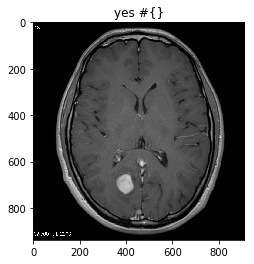

time: 238 ms


In [33]:
#https://gist.github.com/mstfldmr/45d6e47bb661800b982c39d30215bc88  helpful in this
img = cv2.imread(allyes[1])
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #this converted it to a blueish image, i didn't like it.
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_im)
plt.title('yes #{}')
plt.show()

### confirming workflow works with the 2 png files

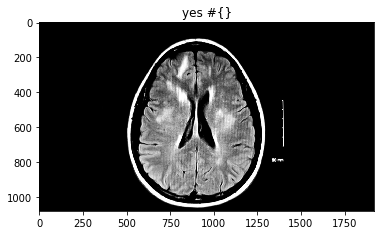

time: 407 ms


In [36]:
#pngY=glob.glob(wd+"/data/raw/yes/"+'*.[pP][nN][gG]')
pngN=glob.glob(wd+"/data/raw/no/"+'*.[pP][nN][gG]')

cv2.imread(pngN[0],0)

img = cv2.imread(pngN[0])
#gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #this converted it to a blueish image, i didn't like it.
RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(RGB_im)
plt.title('yes #{}')
plt.show()

### looking at first 10 yes images

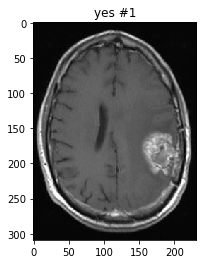

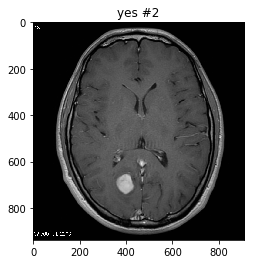

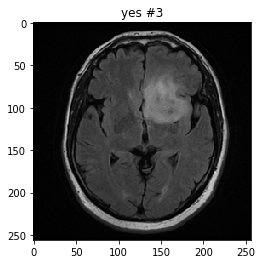

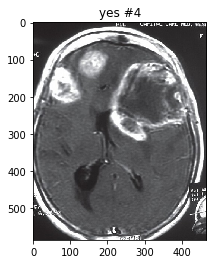

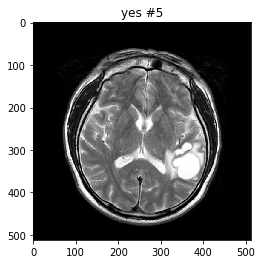

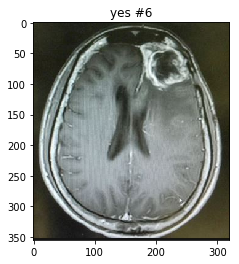

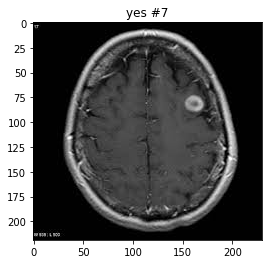

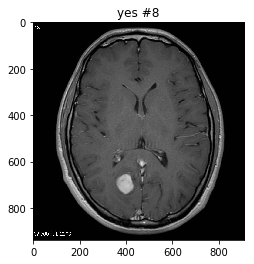

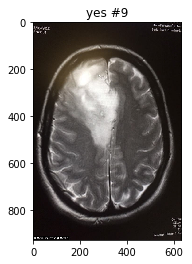

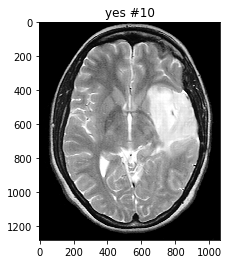

time: 1.83 s


In [34]:
for element in range(0,10):
    img = cv2.imread(allyes[element])
    RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_im)
    plt.title('yes #{}'.format(element+1))
    plt.show()

### looking at first 10 no images

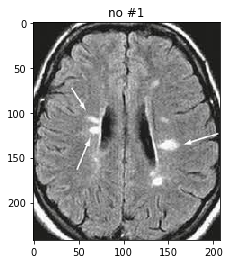

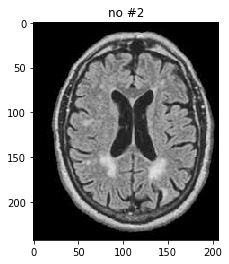

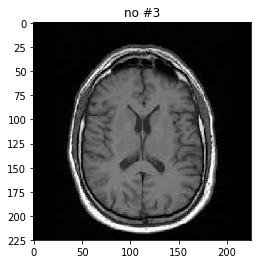

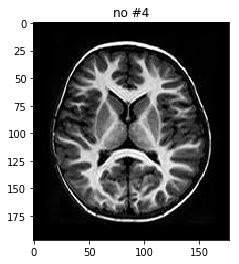

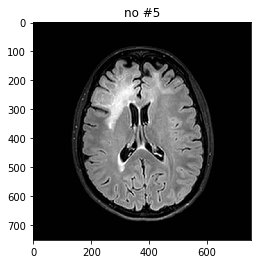

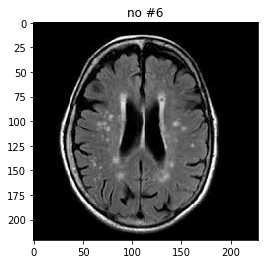

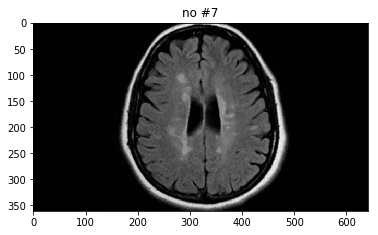

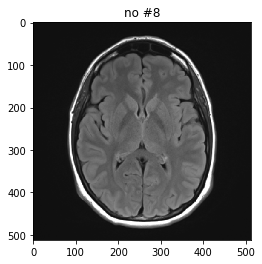

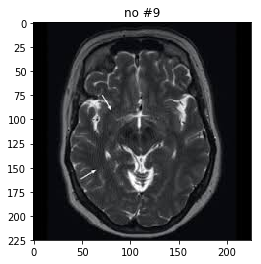

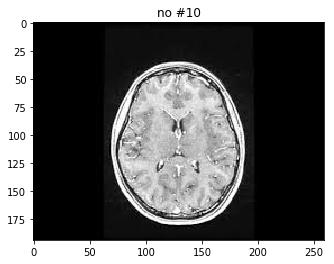

time: 1.34 s


In [22]:
#first 10 no images
for element in range(0,10):
    img = cv2.imread(allno[element])
    RGB_im = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(RGB_im)
    plt.title('no #{}'.format(element+1))
    plt.show()

## notes

* the images do need some preprocessing as there is heterogenity in: 
 * color intensity/contrast
 * baseline color of grey matter
 * image size/cropping
 * maybe image scaling? 
 * depth of the MRI slice is not consistant (ie how far down the skull the image is taken- this can't be fixed by preprocessing. 

*<del> apparently there are 2 .pgn files too: no 9, and Y92
 